<a href="https://colab.research.google.com/github/JulieWang417/DS-Unit-2-Applied-Modeling/blob/master/module2/JW_232_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
# Read New York City property sales data
import pandas as pd
df = pd.read_csv(DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv')

Your code starts here:

In [3]:
# Change column names: replace spaces with underscores
df.columns = df.columns.str.replace(' ','_')
print(df.columns)
df.head(2)


Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object')


BOROUGH NEIGHBORHOOD  ... SALE_PRICE   SALE_DATE
0        1      CHELSEA  ...    $   - 0  01/01/2019
1        1      FASHION  ...    $   - 0  01/01/2019

[2 rows x 21 columns]

In [4]:
# Get Pandas Profiling Report
import pandas_profiling
df.profile_report()

In [5]:
# Keep just the subset of data for the Tribeca neighborhood
# Check how many rows you have now. (Should go down from > 20k rows to 146)
Tribeca = df[df['NEIGHBORHOOD'] == 'TRIBECA']
Tribeca.shape

(146, 21)

In [6]:
# Q. What's the date range of these property sales in Tribeca?
Tribeca['SALE_DATE'] = pd.to_datetime(Tribeca['SALE_DATE'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
day = Tribeca.SALE_DATE.max() - Tribeca.SALE_DATE.min()
print('The date range of these property sales in Tribeca is : ', day)

The date range of these property sales in Tribeca is :  117 days 00:00:00


In [91]:
# The Pandas Profiling Report showed that SALE_PRICE was read as strings
# Convert it to integers


Tribeca['SALE_PRICE'] = Tribeca['SALE_PRICE'].str.replace('$','').str.replace('-','').str.replace(',','')
Tribeca['SALE_PRICE'] = Tribeca['SALE_PRICE'].astype(int) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
# Q. What is the maximum SALE_PRICE in this dataset?
Tribeca['SALE_PRICE'].max()

260000000

In [94]:
# Look at the row with the max SALE_PRICE
df[df['SALE_PRICE']==850000000]

BOROUGH NEIGHBORHOOD  ... SALE_PRICE   SALE_DATE
7745        1      FASHION  ...  850000000  02/08/2019

[1 rows x 21 columns]

In [11]:
# Get value counts of TOTAL_UNITS
# Q. How many property sales were for multiple units?
print('There are ', len(df[df['TOTAL_UNITS'] >= 2]),' property sales for multiple units.')

There are  7825  property sales for multiple units.


In [12]:
# Keep only the single units
print('There are ', len(df[df['TOTAL_UNITS'] == 1]),' property sales for single units.')

There are  10204  property sales for single units.


In [13]:
# Q. Now what is the max sales price? How many square feet does it have?
SQFT_MAX_SALEPRICE = df[df['SALE_PRICE']==850000000]['GROSS_SQUARE_FEET']
print('Square feet for the property with max sales price : ',SQFT_MAX_SALEPRICE.values[0])

Square feet for the property with max sales price :  697029.0


In [19]:
# Q. How often did $0 sales occur in this subset of the data?

# There's a glossary here: 
# https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

# It says:
# A $0 sale indicates that there was a transfer of ownership without a 
# cash consideration. There can be a number of reasons for a $0 sale including 
# transfers of ownership from parents to children. 
p = len(df[df['SALE_PRICE'] == 0]) / len(df) *100
print('There are ',round(p,2),'% property saled for $0.')

There are  29.99 % property saled for $0.


In [39]:
# Look at property sales for > 5,000 square feet
# Q. What is the highest square footage you see?
big_house = df[df["GROSS_SQUARE_FEET"] >= 5000]
print("The highest square footage : ",big_house["GROSS_SQUARE_FEET"].max())

The highest square footage :  1303935.0


In [26]:
# What are the building class categories?
# How frequently does each occur?
pd.DataFrame(df['BUILDING_CLASS_CATEGORY'].value_counts(normalize=True))

BUILDING_CLASS_CATEGORY
01 ONE FAMILY DWELLINGS                                    0.219661
02 TWO FAMILY DWELLINGS                                    0.198220
10 COOPS - ELEVATOR APARTMENTS                             0.150651
13 CONDOS - ELEVATOR APARTMENTS                            0.144922
03 THREE FAMILY DWELLINGS                                  0.062413
07 RENTALS - WALKUP APARTMENTS                             0.035026
09 COOPS - WALKUP APARTMENTS                               0.029167
15 CONDOS - 2-10 UNIT RESIDENTIAL                          0.018273
04 TAX CLASS 1 CONDOS                                      0.018142
44 CONDO PARKING                                           0.015885
17 CONDO COOPS                                             0.013021
05 TAX CLASS 1 VACANT LAND                                 0.012500
22 STORE BUILDINGS                                         0.012500
12 CONDOS - WALKUP APARTMENTS                              0.011111
14 RENTALS - 4-10 UNIT                                     0.008681
29 COMMERCIAL GARAGES                                      0.006380
08 RENTALS - ELEVATOR APARTMENTS                           0.005208
30 WAREHOUSES                                              0.004557
21 OFFICE BUILDINGS                                        0.004167
43 CONDO OFFICE BUILDINGS                                  0.003472
31 COMMERCIAL VACANT LAND                                  0.003472
47 CONDO NON-BUSINESS STORAGE                              0.003255
46 CONDO STORE BUILDINGS                                   0.002821
27 FACTORIES                                               0.002344
06 TAX CLASS 1 - OTHER                                     0.001823
37 RELIGIOUS FACILITIES                                    0.001649
45 CONDO HOTELS                                            0.001389
11A CONDO-RENTALS                                          0.001302
41 TAX CLASS 4 - OTHER                                     0.001302
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT                 0.001259
33 EDUCATIONAL FACILITIES                                  0.001042
28 COMMERCIAL CONDOS                                       0.000998
32 HOSPITAL AND HEALTH FACILITIES                          0.000911
26 OTHER HOTELS                                            0.000651
34 THEATRES                                                0.000304
35 INDOOR PUBLIC AND CULTURAL FACILITIES                   0.000304
23 LOFT BUILDINGS                                          0.000304
25 LUXURY HOTELS                                           0.000260
49 CONDO WAREHOUSES/FACTORY/INDUS                          0.000174
36 OUTDOOR RECREATIONAL FACILITIES                         0.000174
48 CONDO TERRACES/GARDENS/CABANAS                          0.000130
38 ASYLUMS AND HOMES                                       0.000087
39 TRANSPORTATION FACILITIES                               0.000043
42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC                  0.000043

In [40]:
# Keep subset of rows:
# Sale price more than $0, 
# Building class category = Condos - Elevator Apartments

# Check how many rows you have now. (Should be 106 rows.)

SalePrice_great_0 = big_house[big_house['SALE_PRICE'] > 0]

Elevator_Apartments = SalePrice_great_0[SalePrice_great_0['BUILDING_CLASS_CATEGORY'] == '13 CONDOS - ELEVATOR APARTMENTS']
Elevator_Apartments.shape


(108, 21)

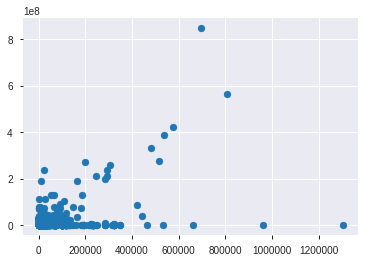

In [42]:
# Make a Plotly Express scatter plot of GROSS_SQUARE_FEET vs SALE_PRICE
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df['GROSS_SQUARE_FEET'],df['SALE_PRICE'])

In [49]:
# Add an OLS (Ordinary Least Squares) trendline,
# to see how the outliers influence the "line of best fit"
import plotly.express as px
px.scatter(df.fillna(method='ffill'), x='GROSS_SQUARE_FEET',y='SALE_PRICE', trendline="ols")

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [69]:
df['GROSS_SQUARE_FEET'].value_counts(normalize = True)

0.0       0.232562
2400.0    0.005209
153.0     0.004688
1440.0    0.004557
1600.0    0.004080
            ...   
7246.0    0.000043
5575.0    0.000043
1614.0    0.000043
1569.0    0.000043
3478.0    0.000043
Name: GROSS_SQUARE_FEET, Length: 3937, dtype: float64

In [76]:
#remove outliers
# Remove the most extreme 1% prices,
# the most extreme .1% square feet
import numpy as np

df1 = df[(df['SALE_PRICE'] > 0) & (df['SALE_PRICE'] < 10000000) & 
        (df['GROSS_SQUARE_FEET'] >0) & (df['GROSS_SQUARE_FEET'] < 4000) 
        ]
df1.head()

BOROUGH             NEIGHBORHOOD  ... SALE_PRICE   SALE_DATE
44        3      OCEAN PARKWAY-NORTH  ...     550000  01/01/2019
61        4           QUEENS VILLAGE  ...     200000  01/01/2019
65        1                  CHELSEA  ...    2000000  01/02/2019
70        1  UPPER WEST SIDE (59-79)  ...    2997613  01/02/2019
71        1  UPPER WEST SIDE (59-79)  ...    1250000  01/02/2019

[5 rows x 21 columns]

In [0]:
# Look at sales for more than $35 million

# All are at 70 Vestry Street
# All but one have the same SALE_PRICE & SALE_DATE
# Was the SALE_PRICE for each? Or in total?
# Is this dirty data?


In [88]:
df2 = df[(df['SALE_PRICE'] > 35000000) & (df['ADDRESS'].str.contains('70 VESTRY STREET'))]
df2.SALE_PRICE



8370    36681561
8371    36681561
8372    36681561
8373    36681561
8374    36681561
8375    36681561
8376    36681561
8377    36681561
8378    36681561
8379    36681561
8380    36681561
8381    36681561
8382    36681561
8383    36681561
8384    36681561
9236    39285000
Name: SALE_PRICE, dtype: int64

almost all of them are the same sale price, It is dirth data, nonuseful

In [99]:
# Make a judgment call:
# Keep rows where sale price was < $35 million

# Check how many rows you have now. (Should be down to 90 rows.)
Tribeca[(Tribeca['SALE_PRICE'] < 35000000) & (Tribeca['SALE_PRICE'] > 0)].shape

(110, 21)

In [0]:
# Now that you've removed outliers,
# Look again at a scatter plot with OLS (Ordinary Least Squares) trendline


In [77]:
px.scatter(df1.fillna(method='ffill'), x='GROSS_SQUARE_FEET',y='SALE_PRICE', trendline="ols")

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [0]:
# Select these columns, then write to a csv file named tribeca.csv. Don't include the index.
Tribeca.to_csv('tribeca.csv')